In [1]:
import sys
sys.path.append('..')

from models.compression.vq_vae import VQVAE
from dataset import ImageCompressionDataModule

/home/vedpatel/.conda/envs/pyml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda"

model = VQVAE(    h_dim=128,
    res_h_dim=128,
    n_res_layers=3,
    n_embeddings=512,
    embedding_dim=64,
    beta=0.25,
    device=device).to(device)

model = VQVAE.load_from_checkpoint("../../checkpoints/cat_dog_model_best.ckpt").to(device)


print(model)

VQVAE(
  (encoder): Encoder(
    (conv_stack): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01, inplace=True)
      (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.01, inplace=True)
      (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ResidualStack(
        (stack): ModuleList(
          (0-2): 3 x ResidualLayer(
            (res_block): Sequential(
              (0): LeakyReLU(negative_slope=0.01, inplace=True)
              (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            )
          )
        )
      )
    )
  )
  (pre_quantization_conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
  (vector_quantization): V

In [3]:
from PIL import Image
import torch

import torchvision.transforms as transforms

img = Image.open("image.png").convert("RGB")
transform = transforms.ToTensor()
img_tensor = transform(img)

In [6]:
out = model(img_tensor.unsqueeze(0).to(device))
_, reconstructed_img, _ = out
reconstructed_img = reconstructed_img.squeeze(0).cpu().detach()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.090130284..1.1241606].


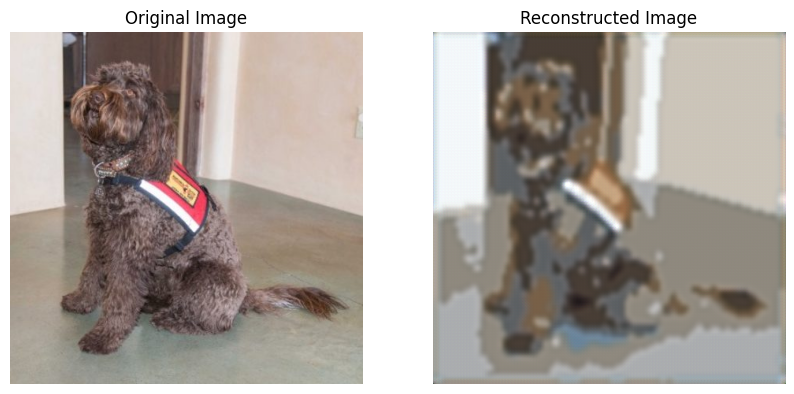

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(reconstructed_img.permute(1, 2, 0).numpy())
axs[1].set_title("Reconstructed Image")
axs[1].axis("off")

plt.show()